# Steps.
- 1 . Preprocess + EDA + feature Selection.
- 2 . Extraction input and output cols.
- 3 . Scale the values.
- 4 . Train test split.
- 5 . Train the model.
- 6 . Evaluate the model/model selection.
- 7 . Deploy the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [3]:
df.shape   # 100 rows and 4 features.

(100, 4)

In [4]:
df  = df.iloc[:,1:]  # Remove the unnamed column.

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.isnull().sum()   # no null values are present.

cgpa         0
iq           0
placement    0
dtype: int64

In [7]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


# features.

- **Numerical feature** = 1.cgpa , 2.iq
- **Categorical feature** = 1. placement

# Univariate analysis.

# cgpa.

- **Insights**
- Average cgpa is 5.99.
- According to histogram the data was normally distributed it means cgpa is close to mean
  
- **Preprocessing**
-  no outliers are present.

In [8]:
df['cgpa'].describe()  # Average cgpa is 5.99

count    100.000000
mean       5.991000
std        1.143634
min        3.300000
25%        5.075000
50%        6.000000
75%        6.900000
max        8.500000
Name: cgpa, dtype: float64

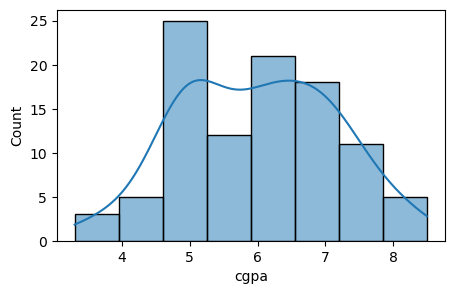

In [9]:
plt.figure(figsize=(5,3))
sns.histplot(df['cgpa'],kde=True)
plt.show()

- According to histogram the data was normally distributed it means cgpa is close to mean .

In [10]:
df['cgpa'].skew()       

-0.0006954038546357086

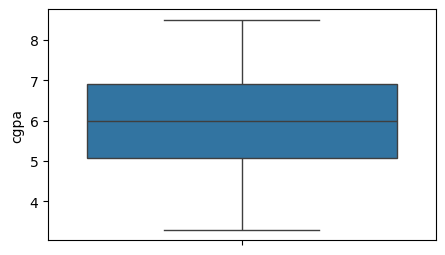

In [11]:
plt.figure(figsize=(5,3))     # no outliers are present.
sns.boxplot(df['cgpa'])
plt.show()

# iq

- **Insights**
- Average IQ is 123.58.
- According to histogram the data was normally distributed it means iq is close to mean.
- some minor  outliers are present but we can remove this beacuse we have small dataset.

In [12]:
df['iq'].describe()   # Average IQ is 123.58

count    100.000000
mean     123.580000
std       39.944198
min       37.000000
25%      101.500000
50%      127.500000
75%      149.000000
max      233.000000
Name: iq, dtype: float64

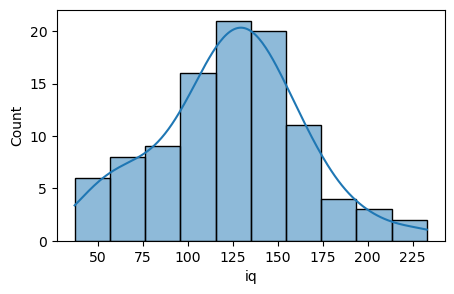

In [13]:
plt.figure(figsize=(5,3))
sns.histplot(df['iq'],kde=True)
plt.show()

- According to histogram the data was normally distributed it means iq is close to mean.

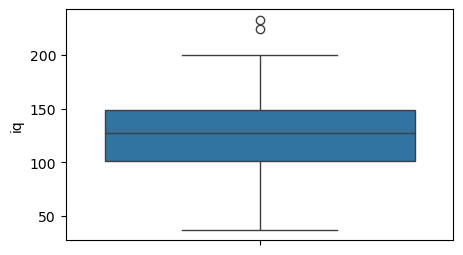

In [14]:
plt.figure(figsize=(5,3))     # some minor  outliers are present but we can remove this beacuse we have small dataset.
sns.boxplot(df['iq'])
plt.show()

# placement.

- **Insights**
- 50% students are get placement and rest of 50 % not get a placement.

- **Preprocessing**

In [35]:
count = df['placement'].value_counts()  # 50% students are get placement and rest of 50 % not get a placement.
count

placement
1    50
0    50
Name: count, dtype: int64

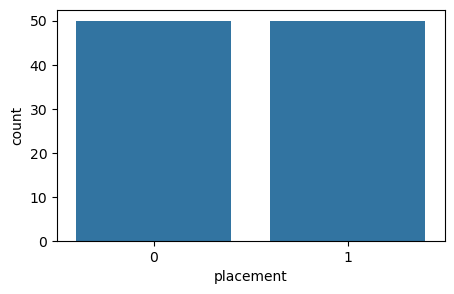

In [38]:
plt.figure(figsize=(5,3))
sns.barplot(count)
plt.show()

# Bivariate analysis.
- My target variable is placement.

# Placement and cgpa.

- **Insights**
- if you have a cgpa of 6 so you have higher chances to be placed. 

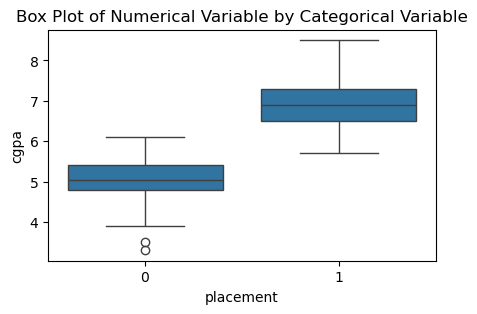

In [40]:
plt.figure(figsize=(5,3))
sns.boxplot(x='placement', y='cgpa', data=df)
plt.title('Box Plot of Numerical Variable by Categorical Variable')
plt.show()

- There is a clear difference in CGPA between students who got placed and those who did not, with placed students having higher CGPAs.
- The spread of CGPA is more concentrated for students who did not get placed, whereas placed students show a wider range of CGPAs but generally higher values.
- The presence of outliers in the non-placed category suggests that some students with lower CGPAs still managed to avoid placement.

# placement and iq.

- **Insights**
- There is little to no difference in the median IQ scores between students who got placed and those who did not, indicating that IQ might not be a significant factor in placement outcomes.

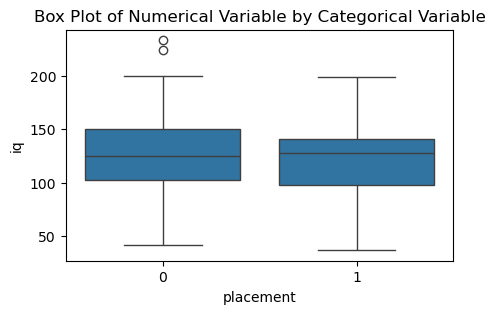

In [43]:
plt.figure(figsize=(5,3))
sns.boxplot(x='placement', y='iq', data=df)
plt.title('Box Plot of Numerical Variable by Categorical Variable')
plt.show()


### **Key Findings:**
- There is little to no difference in the median IQ scores between students who got placed and those who did not, indicating that IQ might not be a significant factor in placement outcomes.
- Both groups show a similar spread of IQ scores, suggesting that the range of IQs is consistent across placed and non-placed students.
- The presence of outliers in the non-placed category with very high IQ scores suggests that having a higher IQ does not necessarily guarantee placement.

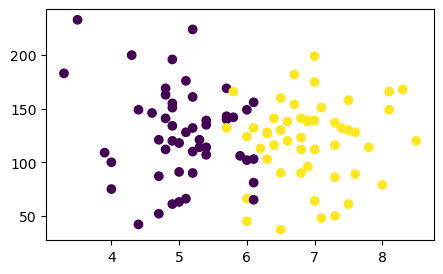

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

#  Extraction input and output cols.

In [44]:
X = df.iloc[:,0:2]   # indipendent variable cgpa & iq.
y = df.iloc[:,-1]    # dependent variable placement.

# Train test split.

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [19]:
X_train

,cgpa,iq
3,7.4,132.0
84,5.7,169.0
41,5.4,114.0
46,5.3,114.0
47,5.2,161.0
...,...,...
63,6.3,128.0
7,5.0,63.0
13,6.4,116.0
20,6.6,120.0


In [20]:
X_test

,cgpa,iq
78,6.1,81.0
34,4.8,163.0
5,7.1,48.0
66,6.9,96.0
81,5.4,107.0
26,7.0,199.0
22,4.9,120.0
58,8.0,79.0
23,4.7,87.0
79,6.5,90.0


# Scale the values.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_train   # now X_train is transformed 

array([[ 1.24789094,  0.16835749],
       [-0.24024089,  1.11536837],
       [-0.50285239, -0.29235051],
       [-0.59038956, -0.29235051],
       [-0.67792672,  0.91060926],
       [ 0.89774227, -1.57209495],
       [ 0.81020511,  0.32192682],
       [ 1.33542811, -1.64887961],
       [ 0.72266794, -0.06199651],
       [ 2.21079977, -0.13878117],
       [-1.72837272, -0.65067895],
       [-0.76546389,  0.06597794],
       [ 0.19744494, -0.3179454 ],
       [ 1.8606511 ,  1.03858371],
       [ 0.02237061, -0.59948917],
       [-0.50285239,  0.24514216],
       [-2.34113288,  1.47369682],
       [ 0.46005644, -2.26315694],
       [ 0.10990778,  0.16835749],
       [ 0.98527944,  0.65466038],
       [-0.15270372,  1.03858371],
       [ 0.46005644,  0.88501438],
       [-0.76546389, -1.52090517],
       [-0.85300106, -0.18997095],
       [ 1.16035377,  0.29633193],
       [ 1.33542811,  0.8338246 ],
       [ 0.02237061, -1.52090517],
       [ 1.8606511 ,  0.6034706 ],
       [-1.37822405,

In [25]:
X_test = scaler.transform(X_test)

In [26]:
X_test   # Now X_test is transformed.

array([[ 0.10990778, -1.13698184],
       [-1.02807539,  0.96179904],
       [ 0.98527944, -1.98161317],
       [ 0.81020511, -0.75305851],
       [-0.50285239, -0.47151473],
       [ 0.89774227,  1.88321504],
       [-0.94053822, -0.13878117],
       [ 1.77311394, -1.18817161],
       [-1.11561255, -0.9834125 ],
       [ 0.46005644, -0.90662784]])

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)  # now train the train dataset of independent and dependent variable.

LogisticRegression()

In [28]:
y_pred = clf.predict(X_test)   # predited 
y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [29]:
y_test

78    0
34    0
5     1
66    1
81    0
26    1
22    0
58    1
23    0
79    1
Name: placement, dtype: int64

# Evalutae the model

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9

# Our model have  90% accuracy in prediction.

# Exporting the model. 

In [31]:
import pickle    # convert object clf into file model.pkl

In [32]:
pickle.dump(clf,open('model.pkl','wb'))